In [1]:
import pandas as pd
from datetime import date
import cpi
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 300

In [2]:
%config InlineBackend.figure_format = 'retina'


In [14]:
df = pd.read_csv("MEHOINUSA646N.csv", parse_dates=True, index_col="DATE")
df = df.rename(columns={"MEHOINUSA646N": "current_dollars"})
df["year"] = df.index.year
df

,current_dollars,year
DATE,,
1981-01-01,10844110,1981
1982-01-01,1700,1982
1982-01-01,1100000,1982
1983-01-01,4000,1983
1983-01-01,1500000,1983
...,...,...
2022-01-01,428215,2022
2022-01-01,529745,2022
2022-01-01,598082,2022


In [15]:
df["real_dollars"] = df.apply(lambda x: cpi.inflate(x["current_dollars"], x["year"]), axis=1)


In [16]:
df

,current_dollars,year,real_dollars
DATE,,,
1981-01-01,10844110,1981,3.491290e+07
1982-01-01,1700,1982,5.155580e+03
1982-01-01,1100000,1982,3.335964e+06
1983-01-01,4000,1983,1.175321e+04
1983-01-01,1500000,1983,4.407455e+06
...,...,...,...
2022-01-01,428215,2022,4.282150e+05
2022-01-01,529745,2022,5.297450e+05
2022-01-01,598082,2022,5.980820e+05


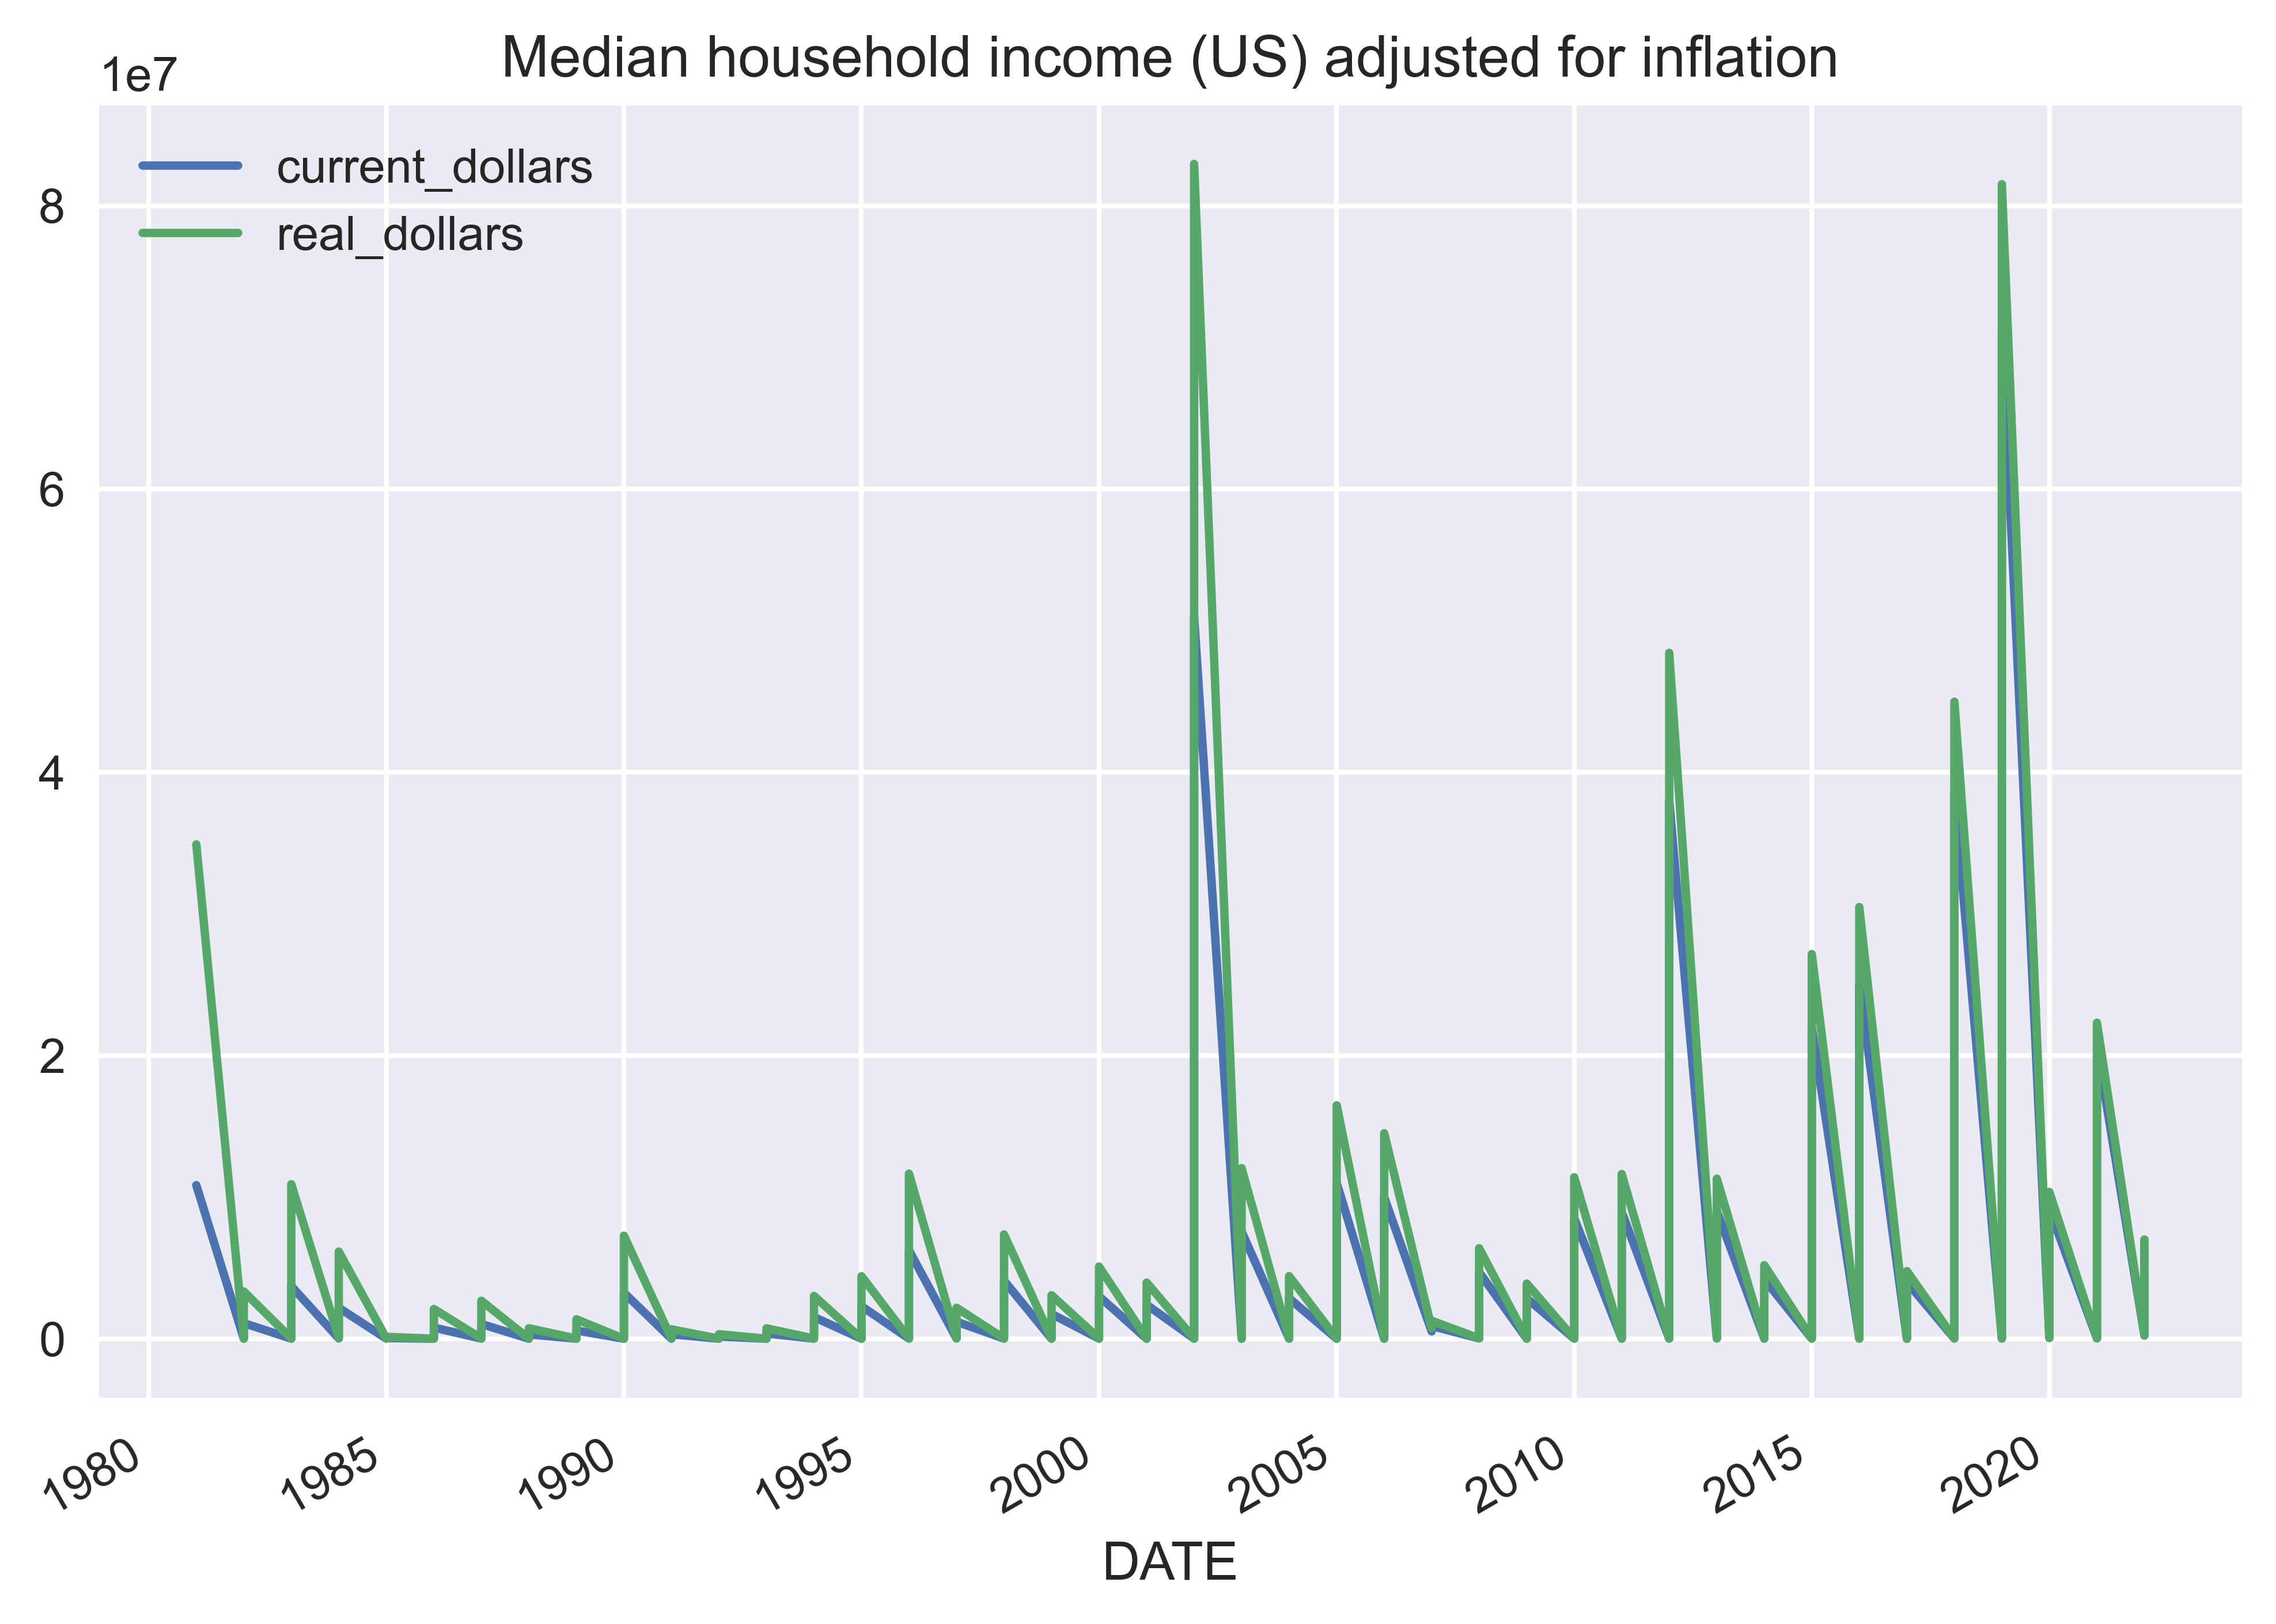

In [17]:
df[["current_dollars", "real_dollars"]].plot(title="Median household income (US) adjusted for inflation");
